Constrained and Non-Convex Optimization
====

## Unit 11, Lecture 2

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, April 12th, 2018

Goals:
---

1. Learn how to perform non-convex optimization
2. Be able to bound optimization and root-finding problems
3. Add constraints to optimization and root-finding
4. Put all these skills together into one example

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
import scipy.optimize

Non-Convex Optimization
====

A highly-challenging, unsolvable problem. There is no general purpose non-convex optimization tool. Scipy uses a sort-of OK method called basin-hopping

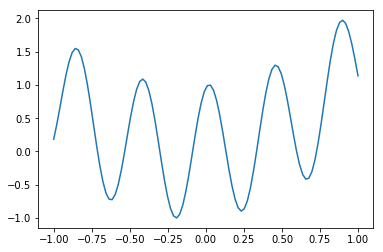

In [13]:
def non_convex(x):
    return np.cos(14.5 * x - 0.3) + (x + 0.2) * x

x = np.linspace(-1,1, 100)
plt.plot(x, non_convex(x))
plt.show()

In [14]:
ret = scipy.optimize.basinhopping(non_convex, x0=1, niter=1000)
print(ret)

                        fun: -1.0008761844426555
 lowest_optimization_result:       fun: -1.0008761844426555
 hess_inv: array([[ 0.00471235]])
      jac: array([  1.51991844e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 3
     njev: 7
   status: 0
  success: True
        x: array([-0.19506755])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 23745
                        nit: 1000
                       njev: 7915
                          x: array([-0.19506755])


Notice you have to specify how long to try for. There is no way that basin hopping will know it's finished. Thus, try a few different iteration numbers and see if it changes.

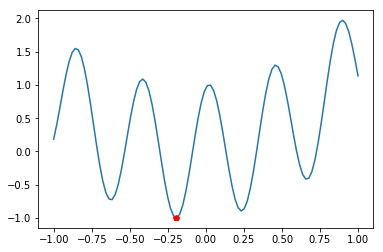

In [15]:
x = np.linspace(-1,1, 100)
plt.plot(x, non_convex(x))
plt.plot(ret.x, ret.fun, 'rp')
plt.show()

Basin-Hopping
====

**Type:** Non-convex wrapper to minimize

**Discrete/Continuous:** Continuous

**Dimensions:** N

**Derivative:** optional

**Convex:** not required

**Python:** `basinhopping`

**Notes:** Pass `minimize` arguments with a `minimizer_kwargs=min_args`, where `min_args` is a dictionary of arguments to the `minimize` function.

Bounded Optimization
====

Often we want to restrict the domain of our objective function. This is done differently for root finding and minimization. There is no good method for bounded root finding in N-dimensions implemented in scipy.

1D Root finding with bounds
====

In [103]:
scipy.optimize.brentq(lambda x: np.sin(x), a=-pi / 2., b = pi / 2)


0.0

Brent's Method
====

**Type:** Bounded Root-finding

**Discrete/Continuous:** Continuous

**Dimensions:** 1

**Derivative:** No

**Convex:** yes

**Python:** `brentq`

**Notes:** a and b are two points on the function such that $b > a$ and the signs of $f(a)$ and $f(b)$ are opposite.

Let's try with $\sin(x)$

In [104]:
scipy.optimize.brentq(lambda x: np.sin(x), a=0.25, b = 0.5)


ValueError: f(a) and f(b) must have different signs

Must have different signs!

In [2]:
scipy.optimize.brentq(lambda x: np.sin(x), a=-0.5, b = 0.5)


0.0

Reaction equilibrium example
====

Consider the reaction:

HA + H$_2$O $\rightarrow$ H$_3$O$^+$ + A$^{-1}$

Let's say that $k=32.5$. If we add 1 M of weak acid, then what is the equilibrium concentration?


$$ \frac{[H+][A-]}{[HA]} = \frac{x\times x}{1 - x} = 32.5$$

$$\frac{x^2}{1-x} - 32.5 = 0$$

In [107]:
k = 32.5

def Q(x):
    return x ** 2 / (1 - x)
def obj(x):
    return Q(x) - k

scipy.optimize.root(obj, x0=0)

    fjac: array([[ 1.]])
     fun: array([ 0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([ -1.22213351e-12])
       r: array([-0.99915843])
  status: 1
 success: True
       x: array([-33.4709901])

In [108]:
scipy.optimize.brentq(obj, a=0, b=1)

ZeroDivisionError: float division by zero

In [109]:
scipy.optimize.brentq(obj, a=0, b=1 - 10**-9)

0.9709900992940665

So the equilibrium concentration of the acid is $1 - x = 0.03\textrm{M}$

1D Minimization with bounds
====

Let's try *minimization* with $\sin x$ bound on the interval $[-\pi, \pi]$

Sequential Least SQuares Programming (SLSQP)
====

**Type:** Bounded or Bounded and Constrained Minimization

**Discrete/Continuous:** Continuous

**Dimensions:** N

**Derivative:** optional

**Convex:** yes

**Python:** `minimize` with bounds argument

**Notes:** bounds look like `bounds=[(min_1, max_1), (min_2, max_2), ...]`. One for each dimension

In [105]:
scipy.optimize.minimize(lambda x: np.sin(x), x0=[0], bounds=[(-pi, pi)])

      fun: array([-1.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 4
   status: 0
  success: True
        x: array([-1.57079634])

2D Minimization with bounds
====

Minimzie $\sin x\cos y$ to be on interval $[-\pi, \pi]$ for both $x$ and $y$

In [106]:
scipy.optimize.minimize(lambda x: np.sin(x[0]) * np.cos(x[1]), x0=[0, 0], bounds=[(-pi, pi), (-pi, pi)])

      fun: -1.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 4
   status: 0
  success: True
        x: array([-1.57079634,  0.        ])

Bounded Minimization Example
====

The entropy of a discrete probability distribution is given by:

$$S = -\sum_Q p_i \ln p_i$$

where the sum is over the sample space of the distribution. Find the maximum entropy binomial distribution $p$ for $N = 5$

We're saying we know all but one parameter, $p$, so we'll find a $p$ such that entropy is maximized. This is a common technique in statistical learning, machine learning, and statistical mechanics. Much of my own research uses this idea of solving underdetermined problems by maximizing entropy.

In [4]:
from scipy.special import comb
import numpy as np

#P(n)
def binomial(n, p, N):
    return comb(N, n) * (1 - p) ** (N - n) * p**n

#Make sure this function works with numpy arrays
test = np.arange(3)
print(binomial(test, 0.2, 5))

[ 0.32768  0.4096   0.2048 ]


In [6]:
#We need to use negative entropy, so it's a minimization problem
def negative_entropy(x):
    p = x
    N = 5
    ps = binomial(np.arange(N + 1), p, N)
    return np.sum(ps * np.log(ps))
negative_entropy(0.2)

-1.2430241623118781

In [7]:
scipy.optimize.minimize(negative_entropy, x0=0.5, bounds=[(10**-9, 1 - 10**-9)])

      fun: -1.5236708720427921
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([  4.44089210e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2
      nit: 0
   status: 0
  success: True
        x: array([ 0.5])

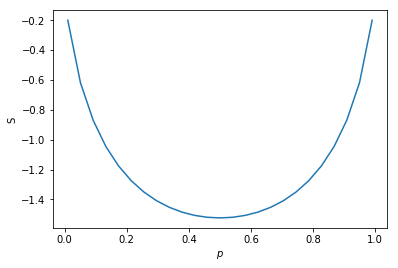

In [11]:
np_negative_entropy = np.frompyfunc(negative_entropy, 1, 1)
x = np.linspace(0.01, 0.99, 25)
plt.plot(x, np_negative_entropy(x))
plt.xlabel('$p$')
plt.ylabel('S')
plt.show()

So each $p$ value corresponds to an entire binomial distribution. Let's see how to plot each of them

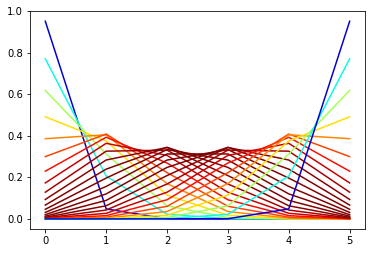

In [9]:
import matplotlib.cm as cm #import some colors

#need this to color based on entropy. It converts entropy to a number between 0 and 1
def entropy_to_01(x):
    return (x - 0.1) / (1.5 - 0.1)

color_grad = cm.jet #my color scheme
n = np.linspace(0, 5, 6)
#plot the binomial for different ps, but colored by their entropy
for pi in np.linspace(0.01,0.99,25):
    plt.plot(n, binomial(n, pi, 5), lw=1.5, color=color_grad(entropy_to_01(-negative_entropy(pi))))
plt.show()

Constrained Minimization
====

Constraints are much more general than bounds. We can use arbitrary numbers of equality and inequality constraints that must be obeyed for a solution.

Consider $x$, $y$ which lie on the circle $x^2 + y^2 = 1$. Find the $x$, $y$ which is as close as possible to the point $(3,4)$. 

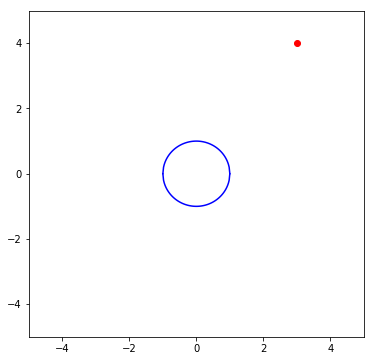

In [16]:
x = np.linspace(-1, 1, 100)

#make sure it's square
plt.figure(figsize=(6,6))

#have to plot the circle in two steps
plt.plot(x, np.sqrt(1 - x**2), color='blue')
plt.plot(x, -np.sqrt(1 - x**2), color='blue')

#now the point
plt.plot(3, 4, 'ro')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()

In [17]:
from math import sqrt

def dist(x1, x2):
    return sqrt(np.sum((x1 - x2)**2))

x1 = np.array([1,5])
x2 = np.array([-2,4])
print(dist(x1, x2))

3.1622776601683795


In [18]:
def circle(x):
    return x[0] ** 2 + x[1] ** 2 - 1

print(circle([0, 1]))

0


In [19]:
def obj(x):
    return dist(x, np.array([3,4]))
print(obj(np.array([2,4])))

1.0


In [20]:
my_constraints = {'type': 'eq', 'fun': circle}
result = scipy.optimize.minimize(obj, x0=[0,1], constraints=my_constraints)
print(result)

     fun: 3.9999999598768268
     jac: array([-0.59999996, -0.80000007])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 0.60000024,  0.79999987])


(-5, 5)

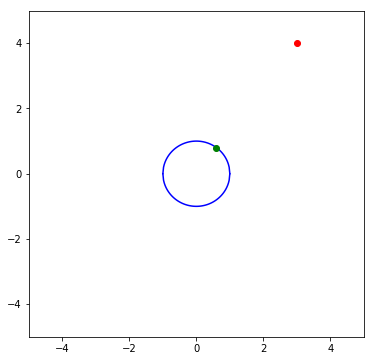

In [21]:
x = np.linspace(-1, 1, 100)

#make sure it's square
plt.figure(figsize=(6,6))

#plot the circle in 2 steps
plt.plot(x, np.sqrt(1 - x**2), color='blue')
plt.plot(x, -np.sqrt(1 - x**2), color='blue')
plt.plot(3, 4, 'ro')
plt.plot(result.x[0], result.x[1], 'go')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

L-BFGS-B
====

**Type:** Constrained Minimization

**Discrete/Continuous:** Continuous

**Dimensions:** N

**Derivative:** optional

**Convex:** yes

**Python:** `minimize` with constraint arguments

Python Dictionaries - Quick Refresher
====

In [22]:
date = {'year': 2015, 'month':'October', 'day': 3}

print(date['year'])

2015


In [23]:
print(date['month'])

October


In [24]:
date['month'] = 'Footober'

print(date['month'])

Footober


Python dictionaries are used when you want to store multiple numed variables together. 

In [25]:
my_constraints = {'type': 'eq', 'fun': circle}

In [26]:
my_constraints = {'type': 'ineq', 'fun': circle} #An inequality constraint

Constraints
====

The constraints are like our work with the `newton` function, one side of the equation is always 0.

$$x^2 + y^2 = 1$$
$$x^2 + y^2 - 1 = 0$$

**Inequality means the quantity is always non-negative**

$$x^2 - 2y > 4$$
$$x^2 - 2y - 4 > 0$$

$$ y < 34$$
$$ y - 34 < 0$$
$$ 34 - y > 0$$

Non-Convex Optimization with Constraints
====

Now that we're good with constraints, let's try to do the ultimate optimization problem: Non-convex with constraints

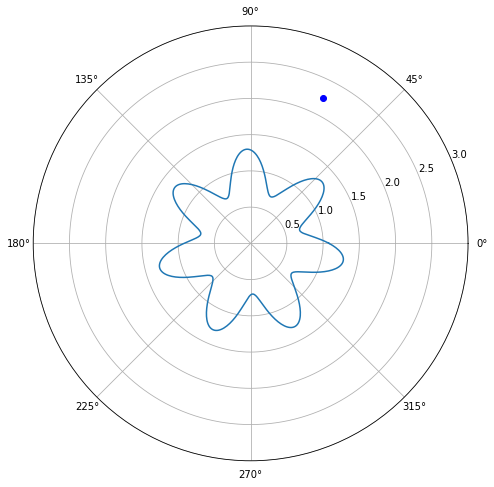

In [27]:
from math import atan, sqrt, sin
x = np.linspace(-1, 1, 100)

#make sure it's square and make it polar
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
theta = np.linspace(0, 2 * pi, 500)
r = 1 + 0.3 * np.sin(7 * (theta + 4))
ax.plot(theta, r)
ax.plot(atan(2 / 1.), sqrt(2**2 + 1**2), 'bo')

ax.set_rmax(3)
plt.show()

We want to find a point on the flower that is as close as possible to the red dot. This is non-convex because there are many local minima. 

In [28]:
def circle_constraint(s):
    x = s[0]
    y = s[1]
    r = sqrt(x**2 + y**2)
    theta = atan(y / x)
    return 1 + 0.3 * np.sin(7 * (theta + 4)) - r
print(circle_constraint(np.array([1,1])))

-0.152546225676


In [29]:
def dist(x1, x2):
    return sqrt(np.sum((x1 - x2)**2))

In [30]:
def obj(x):
    return dist(x, np.array([1,2]))
print(obj(np.array([0,1])))

1.4142135623730951


Basin-hopping is like a wrapper around one of the minimization techniques we've learned. So to communicate with the technique which basin-hopping is using, we have to wrap our constraint dictionary in another dictionary.

In [31]:
my_constraints = {'type':'eq', 'fun':circle_constraint}
minimizer_args = {'constraints':my_constraints}
ret = scipy.optimize.basinhopping(obj, x0=[1,1], niter=1000, minimizer_kwargs=minimizer_args)

In [32]:
print(ret)
print(circle_constraint(ret.x))
print(ret.x)

                        fun: 1.1131024276840382
 lowest_optimization_result:      fun: 1.1131024276840382
     jac: array([-0.09772378, -0.99521358])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 0.89122342,  0.89222535])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 37362
                        nit: 1000
                       njev: 8748
                          x: array([ 0.89122342,  0.89222535])
-6.36809861732e-07
[ 0.89122342  0.89222535]


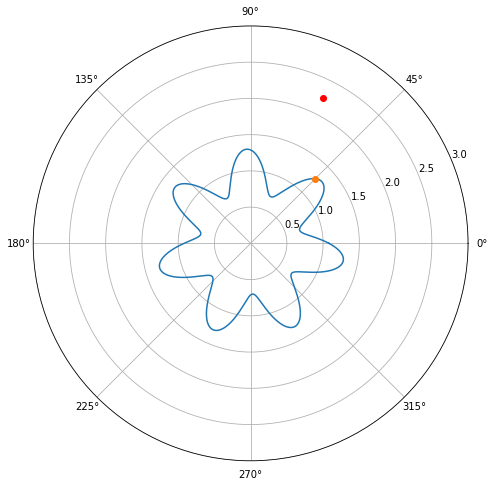

In [33]:
x = np.linspace(-1, 1, 100)

#make sure it's square and make it polar
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
theta = np.linspace(0, 2 * pi, 1500)
r = 1 + 0.3 * np.sin(7 * (theta + 4))
ax.plot(theta, r)
ax.plot(atan(2. / 1.), sqrt(2**2 + 1**2), 'ro')
ax.plot(atan(ret.x[1] / ret.x[0]), sqrt(ret.x[0] ** 2 + ret.x[1] ** 2), 'o')

ax.set_rmax(3)
plt.show()

Basin-Hopping
====

**Type:** Non-convex wrapper to minimize

**Discrete/Continuous:** Continuous

**Dimensions:** N

**Derivative:** optional

**Convex:** not required

**Python:** `basinhopping`

**Notes:** Pass `minimize` arguments with a `minimizer_kwargs=min_args`, where `min_args` is a dictionary of arguments to the `minimize` function.